## Load Cifar100 Dataset

In [1]:
from importlib.util import find_spec
if find_spec("vgg") is None:
    import sys
    sys.path.append('..')

In [2]:
from torchvision import datasets, transforms
from vgg.base import BaseDataLoader

In [183]:
transform_train = transforms.Compose([
    transforms.Resize(224, interpolation=Image.NEAREST),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    ## transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ## transforms.ToTensor(),
])

In [184]:
dataset = datasets.CIFAR100('../data', train=True, download=True, transform=transform_train)

Files already downloaded and verified


In [7]:
import matplotlib.pyplot as plt
from PIL import Image

In [186]:
dataset[0][0].shape, dataset[0][1]

(torch.Size([3, 224, 224]), 19)

In [187]:
dataset.data[0].shape

(32, 32, 3)

In [188]:
type(dataset)

torchvision.datasets.cifar.CIFAR100

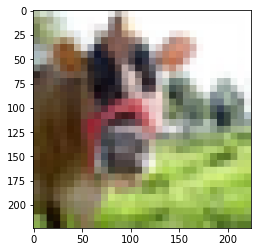

In [189]:
plt.imshow(dataset[0][0].permute(1, 2, 0))    

In [18]:
class Cifar100DataLoader(BaseDataLoader):
    """
    CIFAR100 dataloader with train/val split.
    """
    def __init__(self, data_dir, batch_size, shuffle=True, validation_split=0.0, num_workers=1, training=True):
        
        trsfm = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])
        
        self.data_dir = data_dir
        self.dataset = datasets.CIFAR100(self.data_dir, train=training, download=True, transform=trsfm)
        super().__init__(self.dataset, batch_size, shuffle, validation_split, num_workers)
        

In [19]:
dl = Cifar100DataLoader('../data', 64, validation_split=0.1)

Files already downloaded and verified


In [22]:
dl.dataset

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

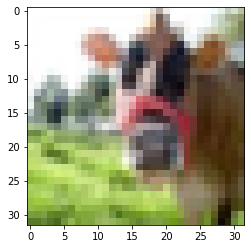

In [24]:
plt.imshow(dl.dataset.data[0])

In [3]:
from vgg.data_loader.data_loaders import DefaultCifar100DataLoader

In [4]:
dl2 = DefaultCifar100DataLoader('../data/', 32)

Files already downloaded and verified


In [5]:
dl2.dataset

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ../data/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

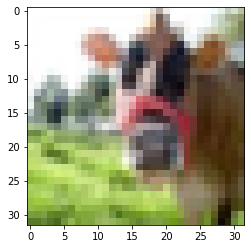

In [9]:
plt.imshow(dl2.dataset.data[0])